# Introduction to Pandas: Plotting

## Preliminaries and Setup

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [ ]:
!sudo apt-get install -y -qq  libgeos-dev libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev
!sudo pip install -U shapely rtree pygeos

!sudo pip install geopandas descartes


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to unpack .../libspatialindex-c4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-c4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-dev:amd64.
Preparing to unpack .../libspatialindex-dev_1

In [ ]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (20, 20)})
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks'])

## Using plotting for data analysis

We finished our earlier notebook by analyzing the [NYPD Vehicle Collissions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set. We continue our analysis now, focusing on plotting.


Just in case you do not have the dataset, you can run the command below, to download the latest version:

In [ ]:
# Takes 2-3 mins to download ~300Mb
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  374M    0  374M    0     0  2571k      0 --:--:--  0:02:29 --:--:-- 3439k


Now let's load the dataset.

In [ ]:
import pandas as pd
df = pd.read_csv(
    "accidents.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False)

And check the datatypes to see if there is something that needs to be coverted.

In [ ]:
df.dtypes

In [ ]:
df['DATETIME'] = df['CRASH DATE'].str.cat(df['CRASH TIME'], sep=' ')
df.DATETIME = pd.to_datetime(df.DATETIME, format="%m/%d/%Y %H:%M")

In [ ]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format="%H:%M")

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format="%m/%d/%Y")

In [ ]:
df['INJURY'] = (df['NUMBER OF PERSONS INJURED']>0)
df['DEATH'] = (df['NUMBER OF PERSONS KILLED']>0)

## Overplotting

Let us create a scatterplot of the accidents.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


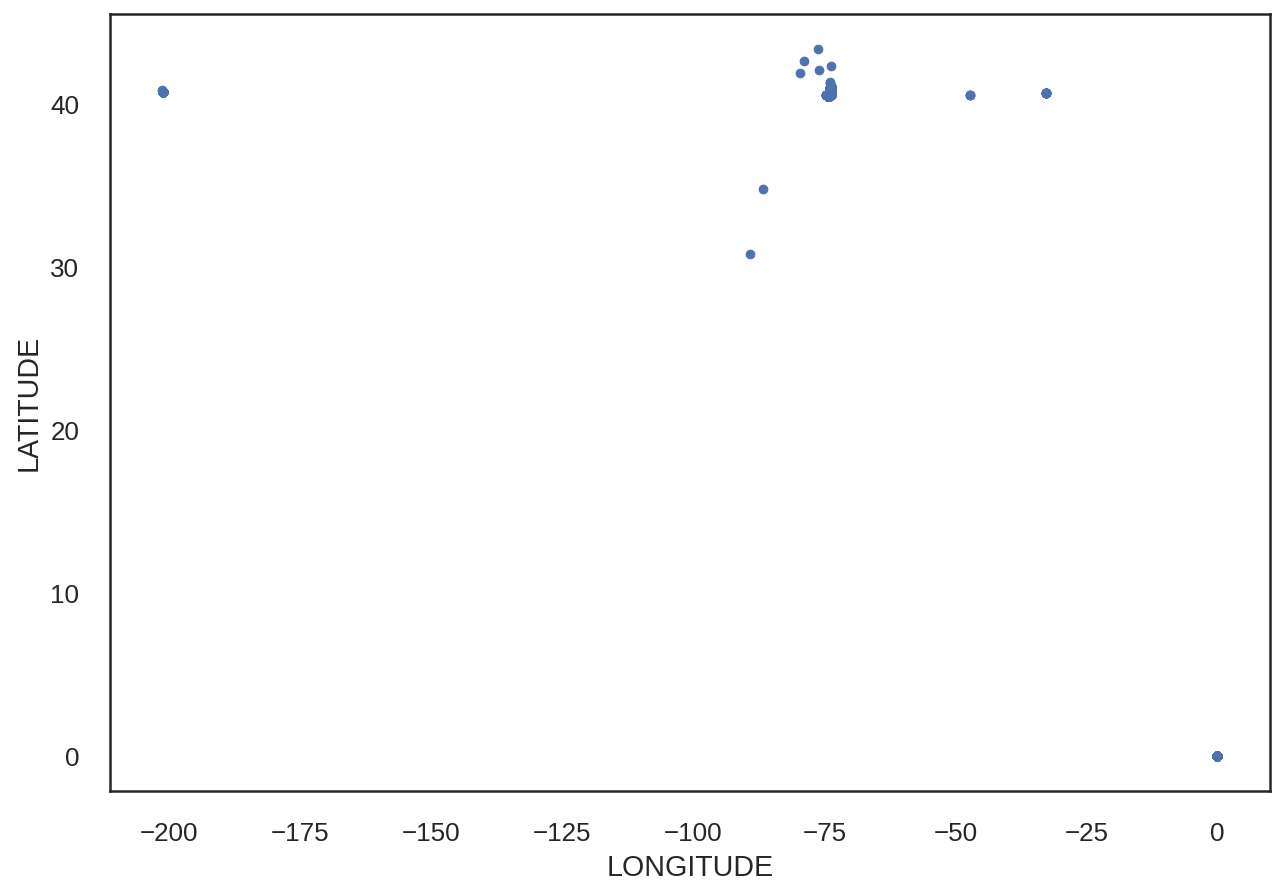

In [ ]:
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

Unfortunately, there were cases in the dataset where longitude and latitude were incorrect. Therefore, we create a selection condition to keep only the entries that are valid. We often call such conditions as **masks**.

In [ ]:
clean_mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)
cleandf = df[clean_mask]

Now we created the new dataframe `cleandf` and we plot again:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


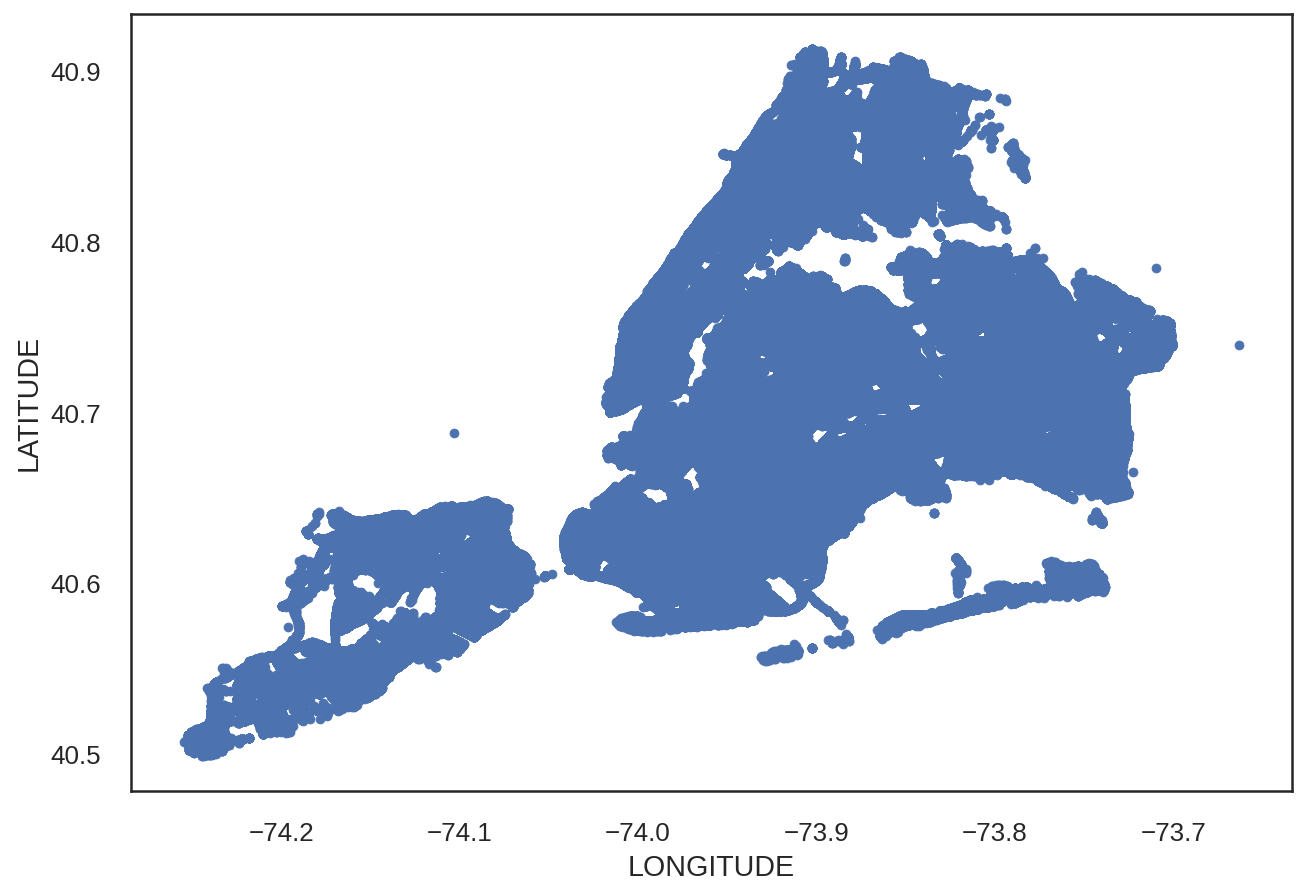

In [ ]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

We start seeing the shape of NYC now. Let's make the plot a bit bigger, using the `figsize = (20,15)` option, asking the size of the figure to have length 20 on the x axis and 15 on the y axis.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


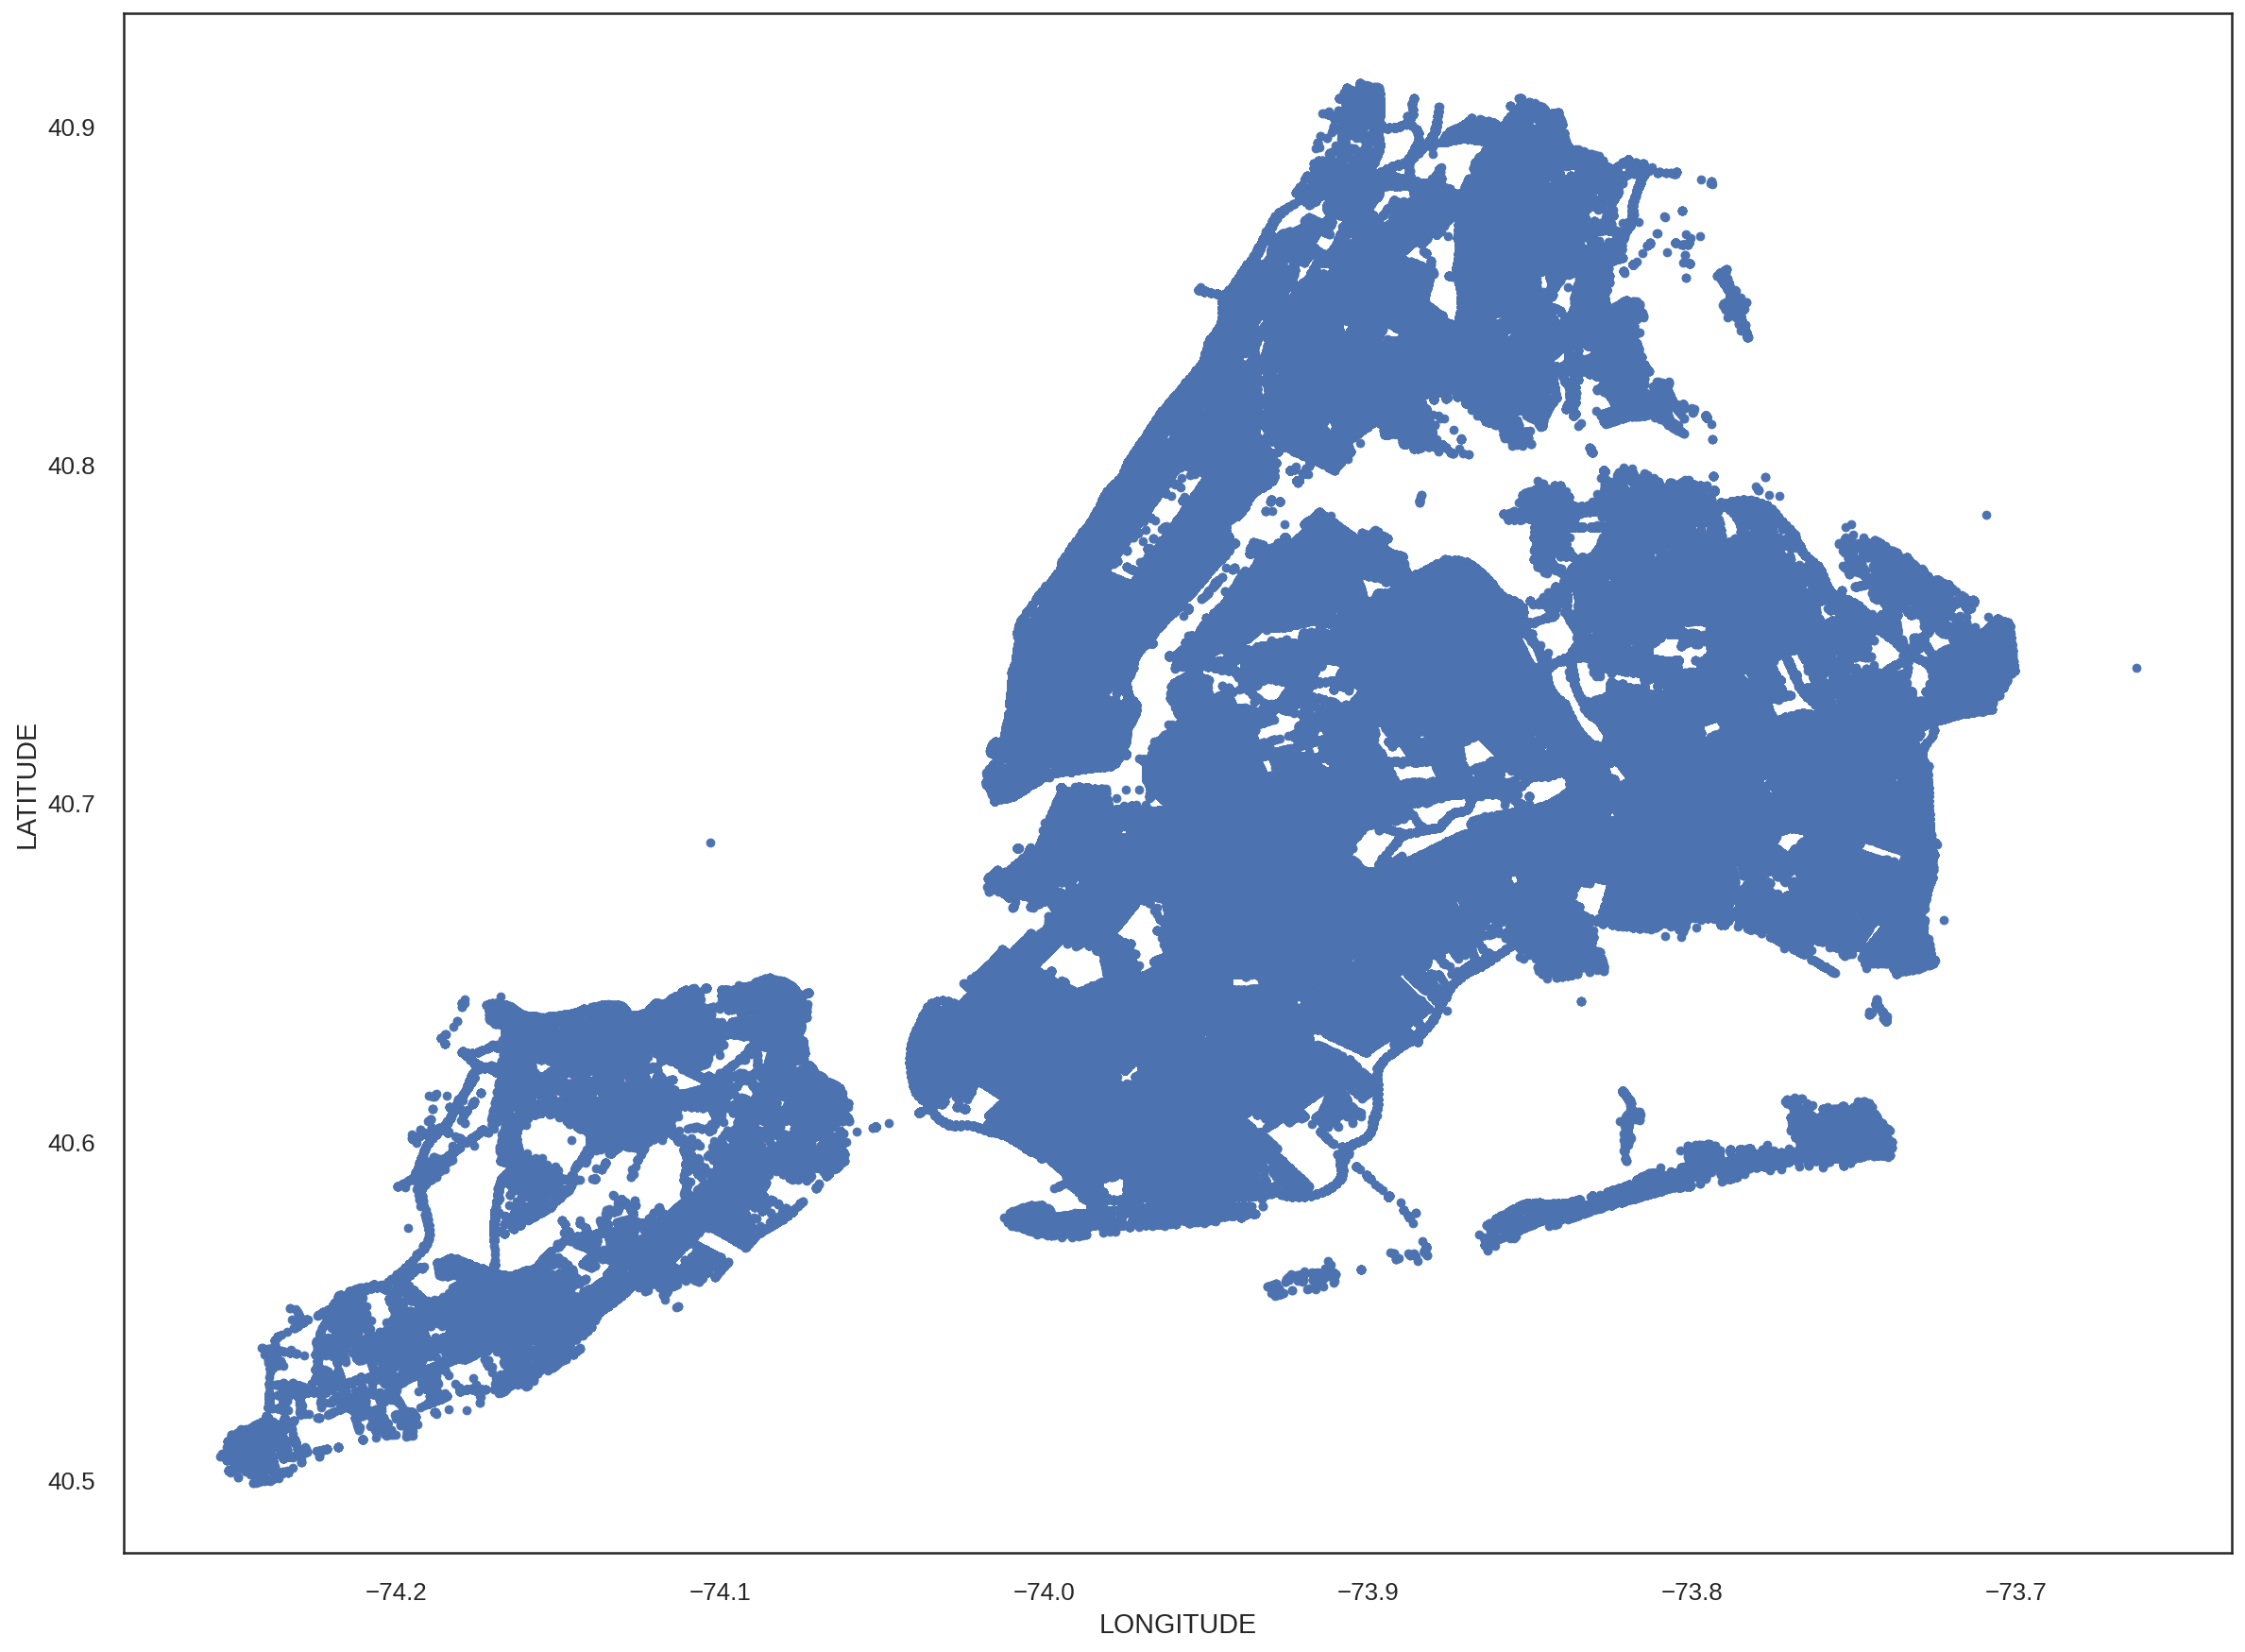

In [ ]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15))

## Addressing Overplotting


The picture above is showing us that accidents happen in all places in NYC, except maybe some areas of Staten Island. But we have so many data points (~1 million), that we cannot tell anything more beyond that. This is called **overplotting**. The issue becomes increasingly common with the emergence of even medium-sized datasets, such as this one.

Below, we are doing to examine a set of techniques for addressing the issue.

### Sampling

One solution, that is commonly used when we have too many data points, is to simply take a subset of the data. Below, by keeping just 1% of the dataset, we can get a feeling of the density if the accidents in Manhattan, especially around midtown.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


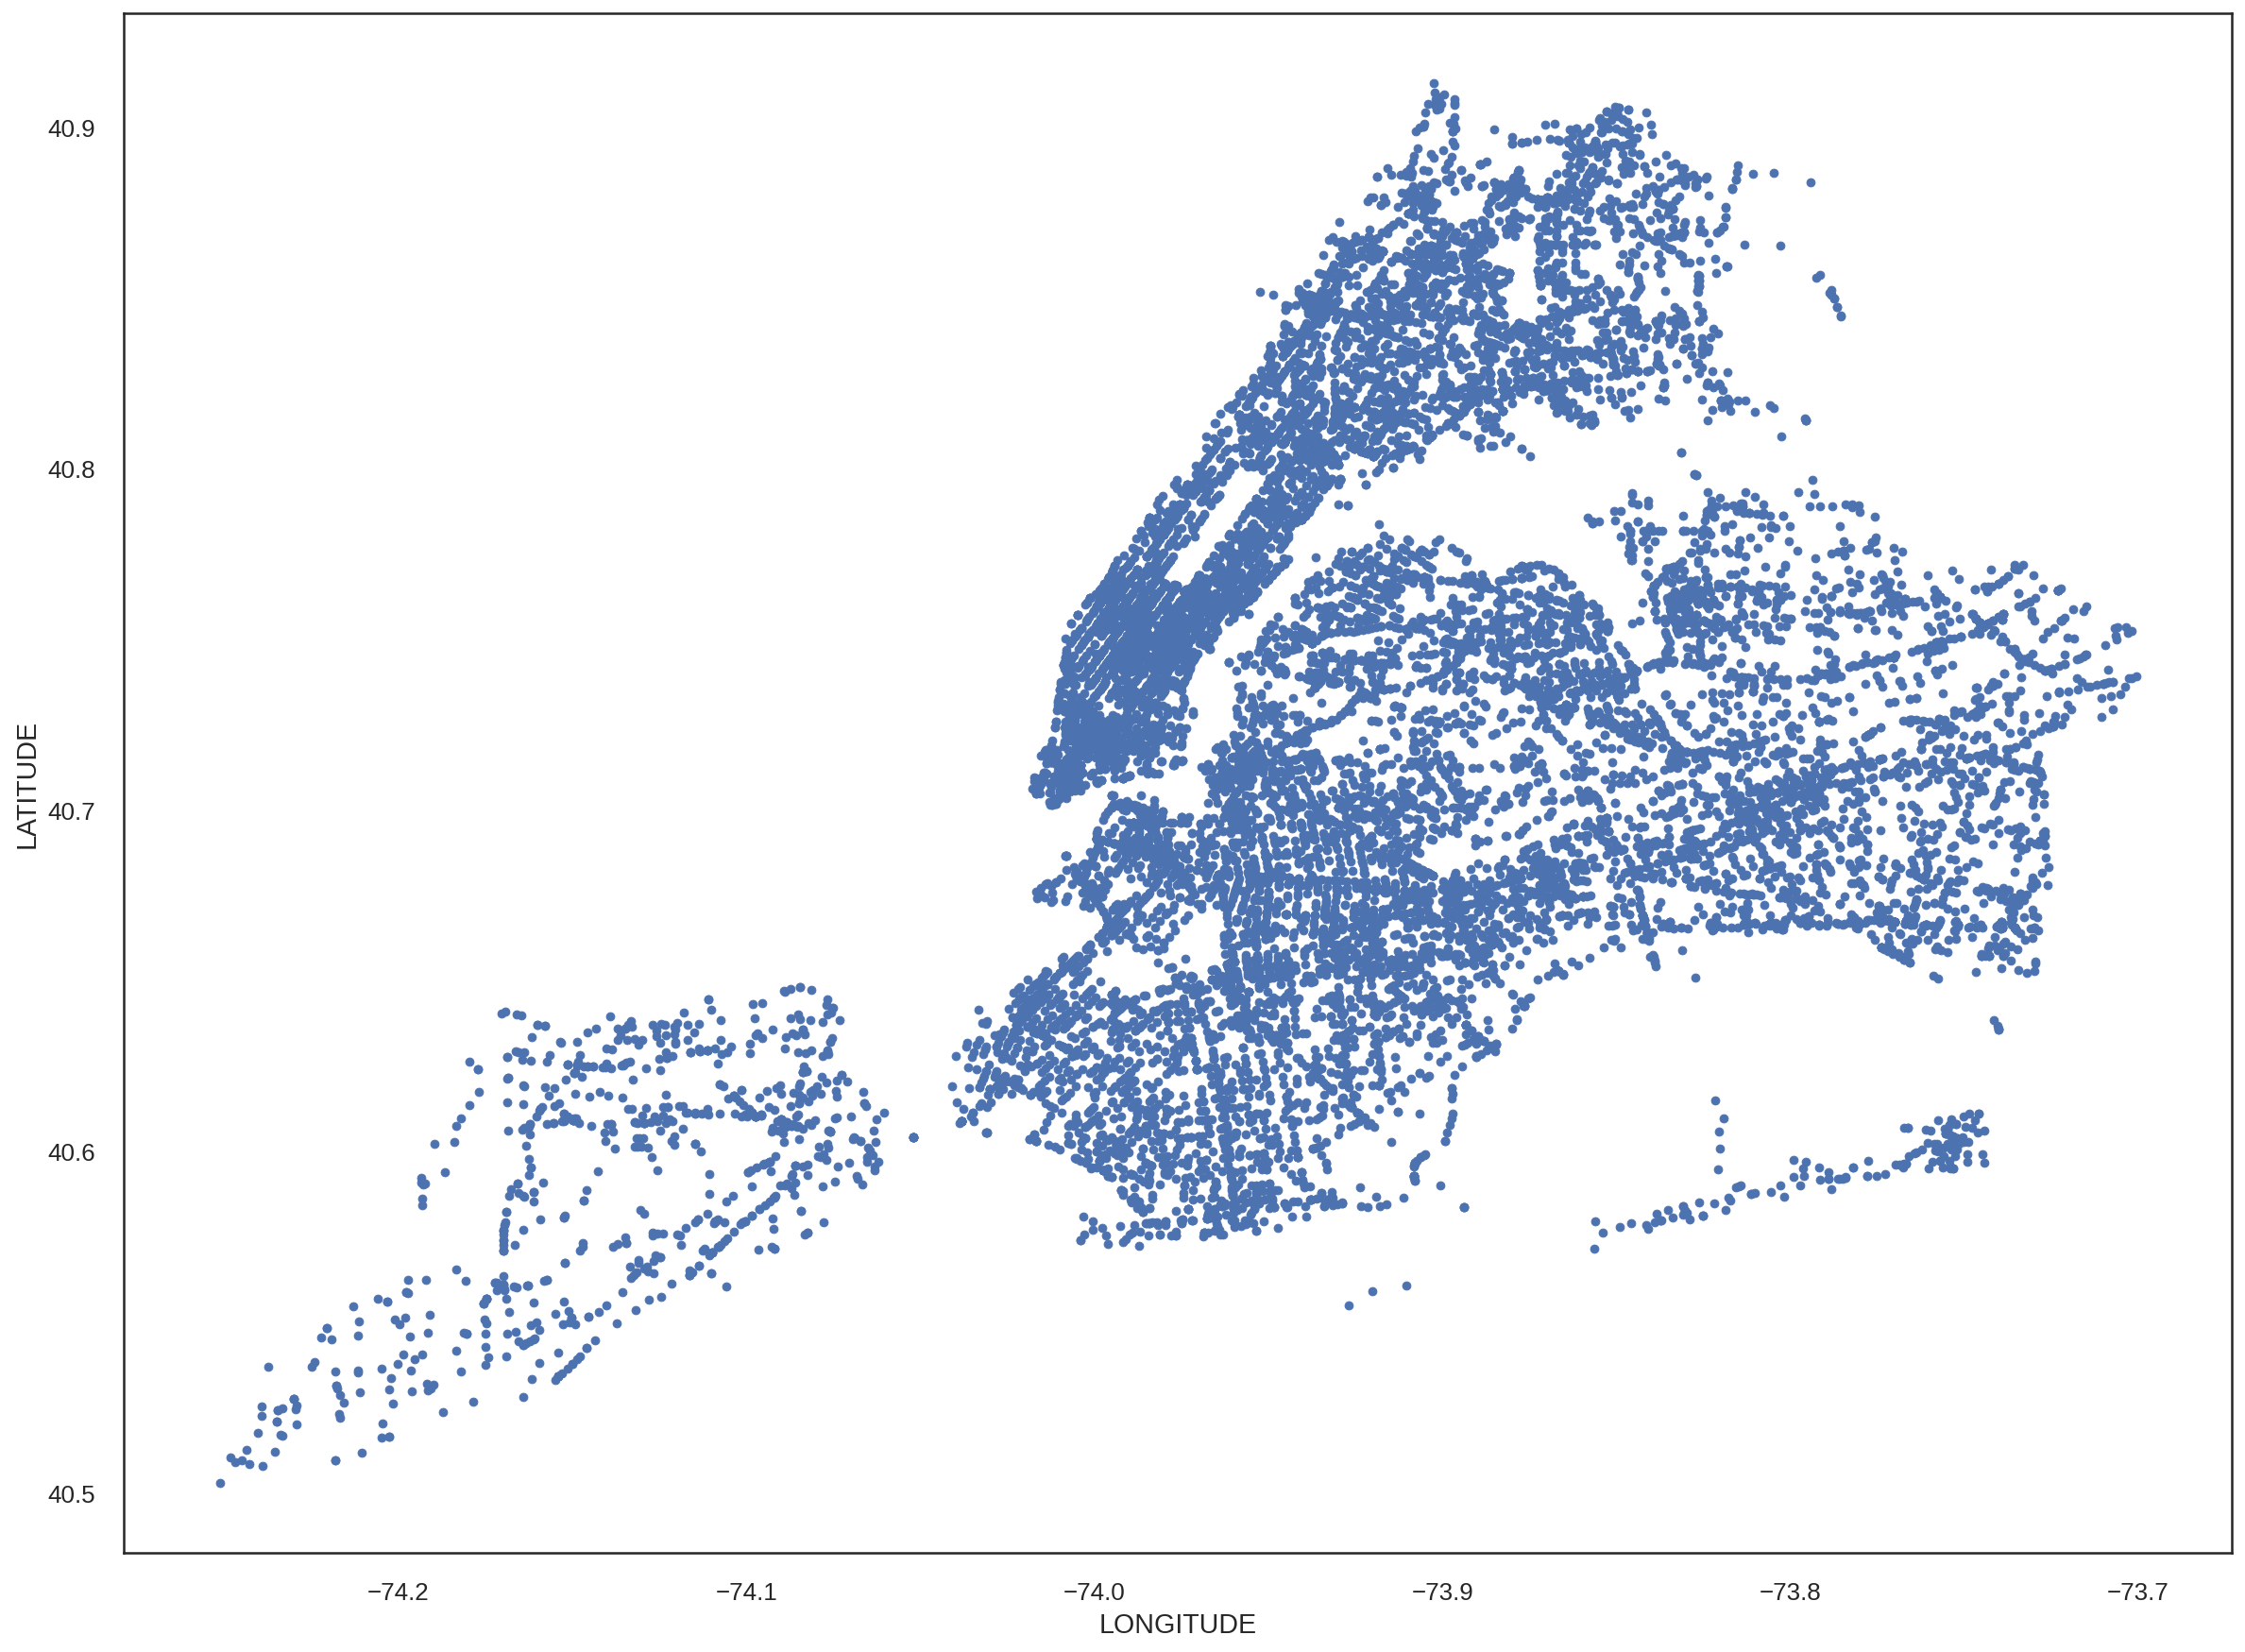

In [ ]:
# We can either specify the number of data points,
# or the percentage of the dataset that we want to keep.

# Keep 10,000 data points
#sample = cleandf.sample(n=10000)

# Keep 1% of the dataset
sample = cleandf.sample(frac=0.01)

sample.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15))

### Changing marker size

Another technique that we can use is to reduce the market size. By default, in Pandas, the marker size for scatterplots is 5 pixels. We can reduce it to 1 pixel by setting `s=1`, or even smaller, eg., `s=0.5`. With this setting, we start seeting that there is a higher density of accidents among major highways.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


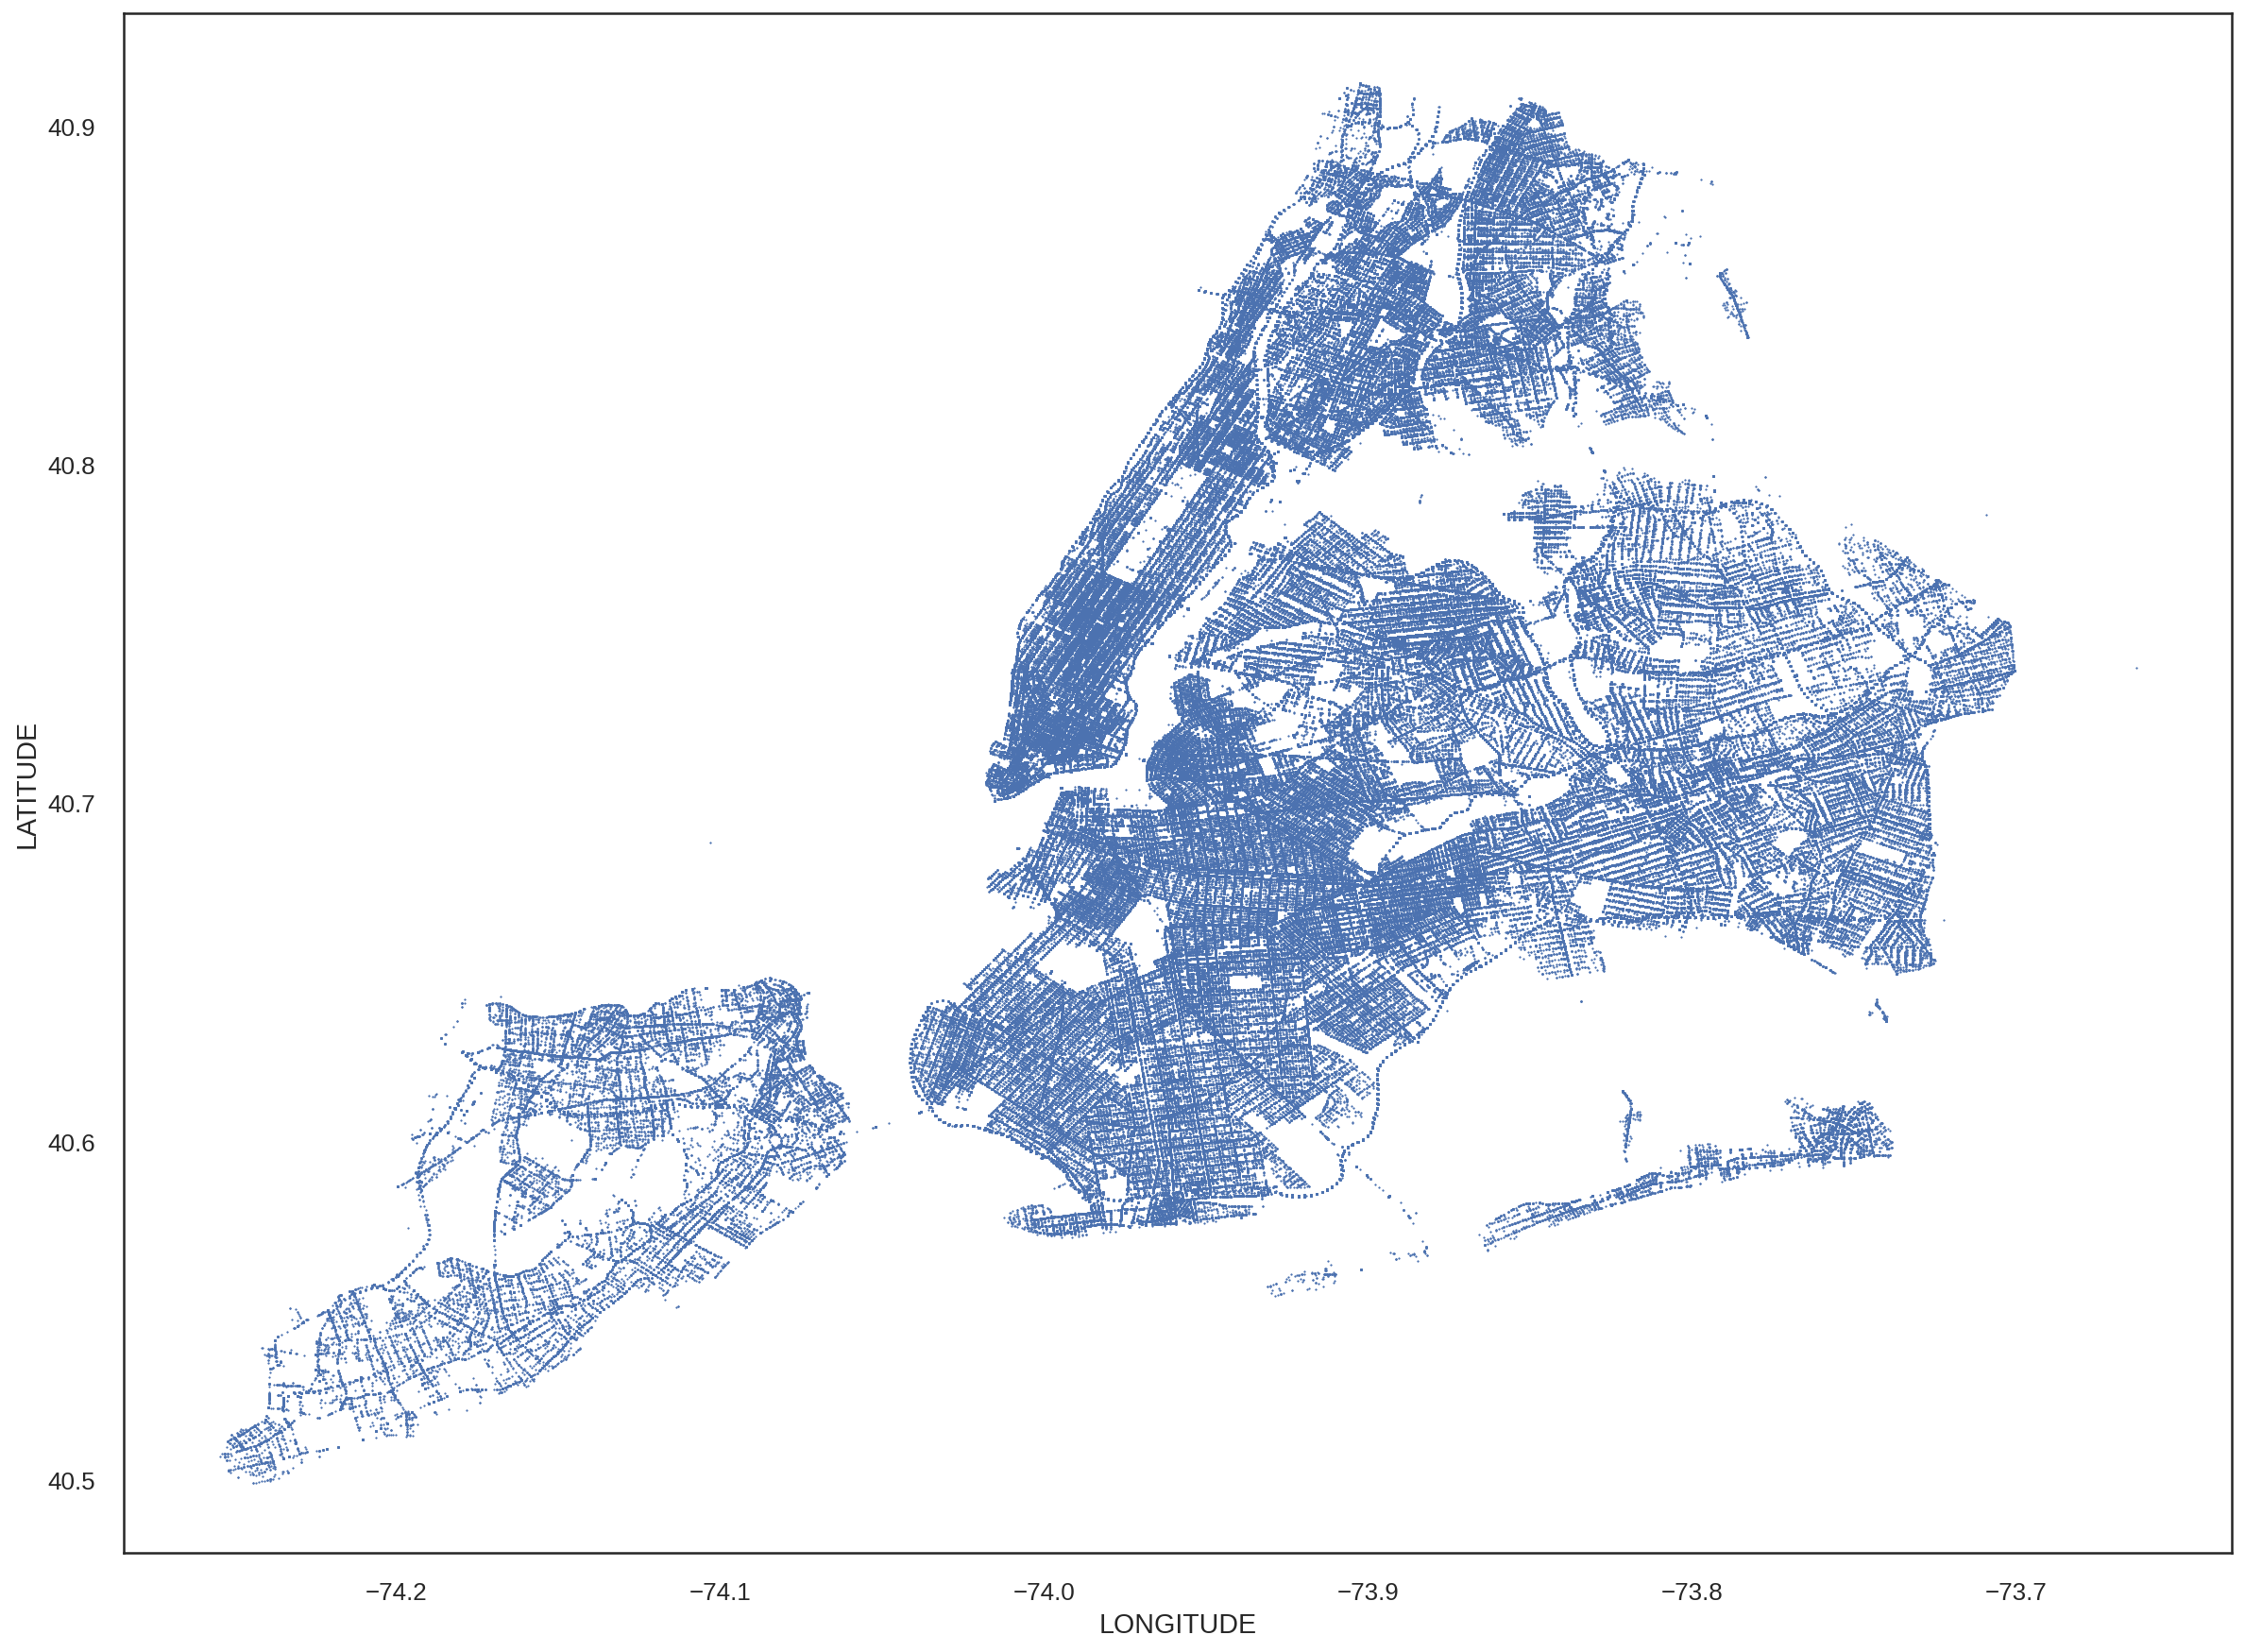

In [ ]:
cleandf.plot(
    kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15), s=0.5 )

### Changing Marker Transparency

Another common technique is to change the  transparency of the  markers. Using semi-transparent markers we can then optically separate areas where there are many points (the area will still look densely plotted), from areas where there are only a few markers. We can set the transparency using the `alpha` parameter. Setting `alpha=1` means no transparency, while `alpha=0` is full transparency.

In [ ]:
cleandf.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.05)

NameError: ignored

### Creating 2d histograms, density plots, and contour plots


In the picture above, we can visually see that Manhattan, especially eastern midtown, and the area downtown near the entrance to the bridges, has a higher density. We can actually directly histograms and density plots on 2-dimensions.

#### Hexagonal bin plot



The hexbin plot created a 2-d histogram, where the color signals the number of points within a particular area. The `gridsize` parameter chooses the size of each bin. Higher values offer higher granularity, but very high values tend to create sparsity, when we do not have enough data points.

In [ ]:
# Hexbin plot
cleandf.plot(
    kind='hexbin',
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=250,
    cmap=plt.cm.Blues,
    figsize=(15, 12))

NameError: ignored